In [ ]:
import pandas as pd

df = pd.read_csv("/content/creditcard_2023.csv")

df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


<ipython-input-1-5fd0af25ae7f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')


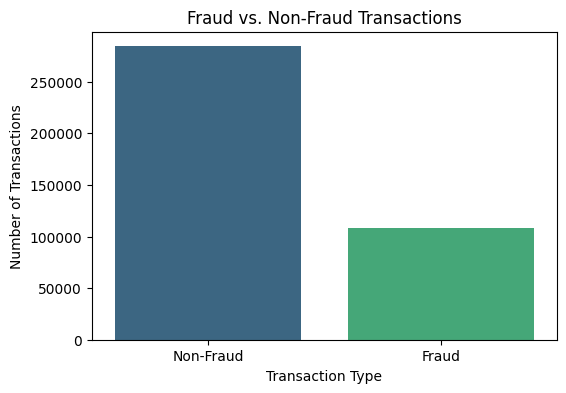

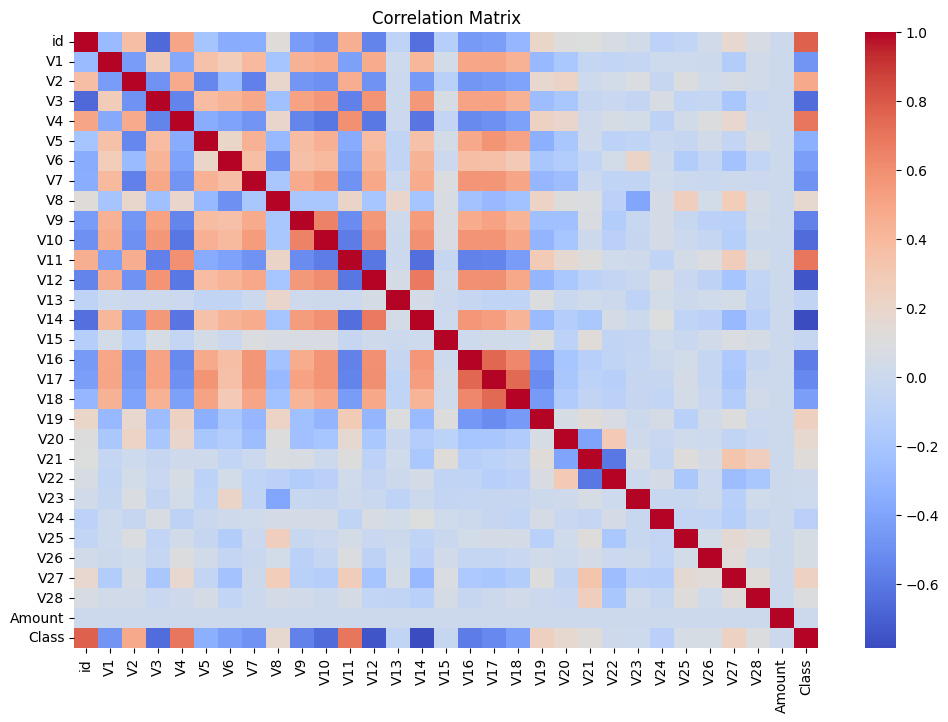

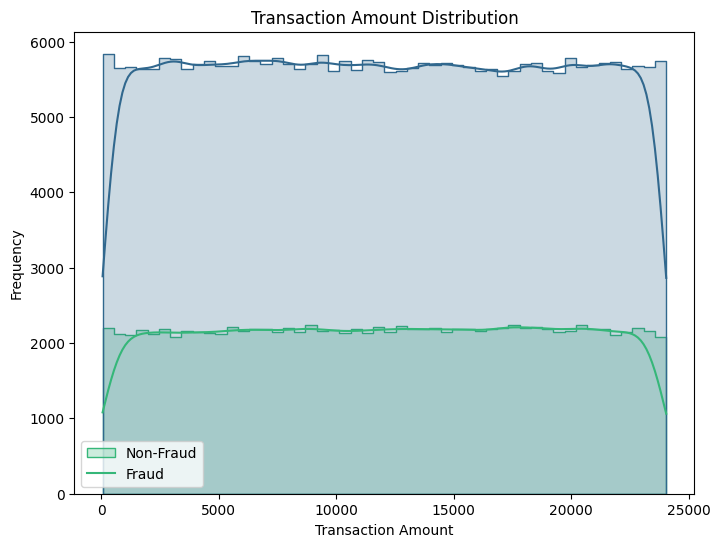

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('/content/creditcard_2023.csv')


# 1. Fraud vs. Non-Fraud Proportions
fraud_counts = df['Class'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')
plt.title('Fraud vs. Non-Fraud Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')
plt.show()

# 2. Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 3. Transaction Amount Distribution (Fraud vs. Non-Fraud)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Amount', hue='Class', kde=True, palette='viridis', bins=50, element="step")
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()


# Naive Bayes


Missing values in 'Class': 0
Missing values in 'Class' after cleaning: 0
Missing values in features:
 id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Confusion Matrix:
 [[83705  1444]
 [10147 75293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94     85149
           1       0.98      0.88      0.93     85440

    accuracy                           0.93    170589
   macro avg       0.94      0.93      0.93    170589
weighted avg       0.94      0.93      0.93    170589


Accuracy: 0.9320530632104063


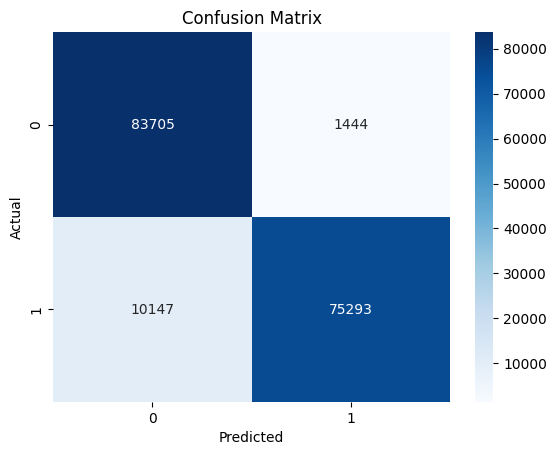

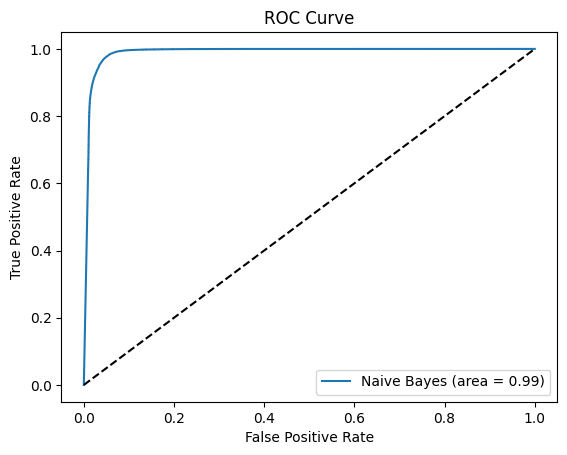

In [ ]:
#Naive bayes
import pandas as pd #to handle data frames
from sklearn.model_selection import train_test_split #for splitting data
from sklearn.naive_bayes import GaussianNB #getting the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler #importing scaler from preprocessing data module
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("creditcard_2023.csv")

# Check for missing values in the target column
print("Missing values in 'Class':", df['Class'].isnull().sum())

# Handle missing values in the target column
df = df.dropna(subset=['Class'])  # Drop rows where 'Class' is NaN

# Verify there are no NaN values left in the target column
print("Missing values in 'Class' after cleaning:", df['Class'].isnull().sum())

# Check for missing values in the feature columns
print("Missing values in features:\n", df.isnull().sum())

# Fill missing values in features
df = df.fillna(df.median())  # Replace NaNs with the median of each column

#seperating the features and target variable in x and y
#essential step to prepare the data for ML alg.
x = df.drop('Class', axis=1) #features (ind. variables)
y = df['Class'] #target (dep. variables, fraudulent (1) and non-fraudulent(0))

#standardize features on the same scale
scaler = StandardScaler() #initialize the scaler
x = scaler.fit_transform(x) #use the scaler on the data (to have mean of 0 and SD of 1)

#splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#train_test_split function comes from sklearn.model_selection module a
#it splits the data into training and test sets RANDOMLY
#30% of the data will be used for testing
#70% of the data will be used for training
#random_states=42 contorls the randomness of the splitting process
#x_train, x_test are subsets of he features used for training and testing
#y_train, y_test are subsets of the target used for training and testing

#initialize and training the NB model
NB_model = GaussianNB() #creates an instance of the GaussianNB class
NB_model.fit(x_train, y_train) #trains (or fits) the model using the training data subsets

#model makes actual predictions on the test data using the now trained model
y_predicted = NB_model.predict(x_test)
#output is an array stored in y_predict that have predicted labels for each row in x_test subset
#labels are 1 (fraudulenet) and 0 (non-fraudulent)

#evaluations to understand the model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted))
print("\nClassification Report:\n", classification_report(y_test, y_predicted))
print("\nAccuracy:", accuracy_score(y_test, y_predicted))
#confusion matrix: gives counts of true pos., false pos., true neg., and false neg. to see where the model is making errors
#classification report: gives precision, recall, and F-1 score
#Accuracy: measures overall performance (usually more insightful for balanced data)

#Visuals
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


if hasattr(NB_model, "predict_proba"):
        y_prob = NB_model.predict_proba(x_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label="Naive Bayes (area = {:.2f})".format(roc_auc_score(y_test, y_prob)))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()


# Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm

# Load the dataset
df = pd.read_csv("creditcard_2023.csv")

# Check for missing values in the target column
print("Missing values in 'Class':", df['Class'].isnull().sum())

# Handle missing values in the target column
df = df.dropna(subset=['Class'])  # Drop rows where 'Class' is NaN

# Verify there are no NaN values left in the target column
print("Missing values in 'Class' after cleaning:", df['Class'].isnull().sum())

# Check for missing values in the feature columns
print("Missing values in features:\n", df.isnull().sum())

# Fill missing values in features
df = df.fillna(df.median())  # Replace NaNs with the median of each column

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

# Initialize Random Forest
n_estimators = 100
rf_model = RandomForestClassifier(n_estimators=1, random_state=42, warm_start=True)

# Train the model incrementally
with tqdm(total=n_estimators, desc="Training Progress") as pbar:
    for i in range(2, n_estimators + 1):
        rf_model.set_params(n_estimators=i)
        rf_model.fit(X_train, y_train)
        pbar.update(1)

# Test the model
batch_size = 100
y_pred = []

with tqdm(total=len(X_test), desc="Testing Progress") as pbar:
    for start in range(0, len(X_test), batch_size):
        end = min(start + batch_size, len(X_test))
        y_pred_batch = rf_model.predict(X_test[start:end])
        y_pred.extend(y_pred_batch)
        pbar.update(end - start)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Missing values in 'Class': 0
Missing values in 'Class' after cleaning: 0
Missing values in features:
 id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Testing Progress: 100%|██████████| 170589/170589 [00:16<00:00, 10522.96it/s]



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


Accuracy:
0.9997596562498168

Confusion Matrix:
[[85287     7]
 [   34 85261]]


# KNN

Missing values in 'Class': 0
Missing values in 'Class' after cleaning: 0
Missing values in features:
 id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Accuracy: 99.91%
Precision: 99.91%
Recall: 99.91%
F1 Score: 99.91%


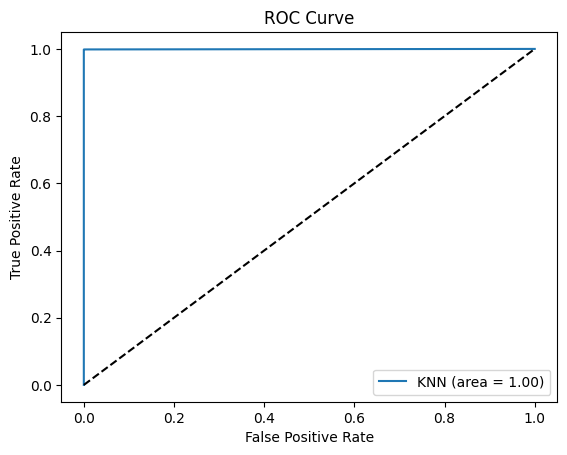

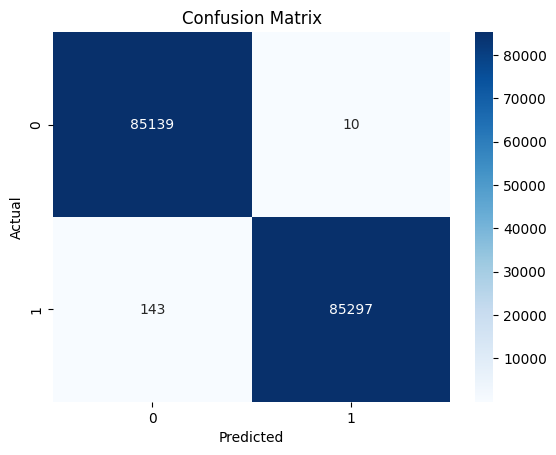

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def KNN_Model():
  knn = KNeighborsClassifier(n_neighbors=5)
  return knn

def train_knn_model(X_train, y_train):
    knn = KNN_Model()
    knn.fit(X_train, y_train)
    return knn

def make_predictions(knn, X_test):
    y_pred = knn.predict(X_test)
    return y_pred

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    print(f"Precision: {precision * 100:.2f}%")
    recall = recall_score(y_test, y_pred, average="weighted")
    print(f"Recall: {recall * 100:.2f}%")
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1 Score: {f1 * 100:.2f}%")
    if hasattr(knn, "predict_proba"):
        y_prob = knn.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label="KNN (area = {:.2f})".format(roc_auc_score(y_test, y_prob)))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


data = pd.read_csv("/content/creditcard_2023.csv")



print("Missing values in 'Class':", data['Class'].isnull().sum())

# Handle missing values in the target column
data = data.dropna(subset=['Class'])  # Drop rows where 'Class' is NaN

# Verify there are no NaN values left in the target column
print("Missing values in 'Class' after cleaning:", data['Class'].isnull().sum())

# Check for missing values in the feature columns
print("Missing values in features:\n", data.isnull().sum())

# Fill missing values in features
data = data.fillna(data.median())  # Replace NaNs with the median of each column



X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = train_knn_model(X_train, y_train)
y_pred = make_predictions(knn, X_test)
evaluate_model(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)